In [63]:
# Add in Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Graduation Data

In [64]:
# Read in Graduation File from Excel
grad_file = "Resources/Copy of 2018 Graduation Indicators-1.xlsx"
grad_df = pd.read_excel(grad_file, sheet_name='School')

new_head = grad_df.iloc[3] 
grad_df2 = grad_df[4:] 
grad_df2.columns = new_head
grad_df2.head()

3,Data Year,District Number,District Type,District Name,School Number,School Name,Demographic Category,Demographic Description,Ending Status,Four Year Count,...,Five Year Percent,Six Year Count,Six Year Total,Six Year Percent,Seven Year Count,Seven Year Total,Seven Year Percent,School Classification,School County Number,School County Name
4,17-18,0001,01,Aitkin Public School District,001,Aitkin Secondary School,A,All Students,Graduate,79,...,95.65,93,99,93.94,80,88,90.91,33,01,Aitkin
5,17-18,0001,01,Aitkin Public School District,001,Aitkin Secondary School,A,All Students,Drop Out,4,...,3.26,6,99,6.06,6,88,6.82,33,01,Aitkin
6,17-18,0001,01,Aitkin Public School District,001,Aitkin Secondary School,A,All Students,Continuing,2,...,0,0,99,0,0,88,0,33,01,Aitkin
7,17-18,0001,01,Aitkin Public School District,001,Aitkin Secondary School,A,All Students,Unknown,2,...,1.09,0,99,0,2,88,2.27,33,01,Aitkin
8,17-18,0001,01,Aitkin Public School District,001,Aitkin Secondary School,G,White Students,Graduate,72,...,96.47,92,98,93.88,77,84,91.67,33,01,Aitkin


In [65]:
list(grad_df2)

['\nData\nYear',
 '\nDistrict\nNumber',
 '\nDistrict\nType',
 '\nDistrict\nName',
 '\nSchool\nNumber',
 '\nSchool\nName',
 '\nDemographic\nCategory',
 '\nDemographic\nDescription',
 '\nEnding\nStatus',
 '\nFour \nYear Count',
 '\nFour \nYear Total',
 '\nFour \nYear Percent',
 '\nFive \nYear Count',
 '\nFive \nYear Total',
 '\nFive \nYear Percent',
 '\nSix \nYear Count',
 '\nSix \nYear Total',
 '\nSix \nYear Percent',
 '\nSeven \nYear Count',
 '\nSeven \nYear Total',
 '\nSeven \nYear Percent',
 '\nSchool \nClassification',
 'School\nCounty\nNumber',
 'School\nCounty\nName']

In [66]:
#Rename Columns
grad_df2.rename(columns = {'\nDistrict\nNumber':'District Number',
                           '\nDistrict\nType':'District Type',
                           '\nSchool\nNumber': 'School Number', 
                           '\nSchool\nName': 'School Name',
                           '\nDemographic\nDescription': 'Demographic Description',
                           '\nEnding\nStatus': 'Ending Status',
                           '\nFour \nYear Percent': 'Four Year Percent',
                           '\nFour \nYear Total': 'Four Year Total'}, inplace = True) 
grad_df2['School Name'] = grad_df2['School Name'].str.upper() 

In [67]:
#Create ORGID for all schools
grad_df2["ORGID"] = grad_df2["District Type"].map(str) + grad_df2["District Number"].map(str) + grad_df2["School Number"] + "000"
grad_df2.head()

3,Data Year,District Number,District Type,District Name,School Number,School Name,Demographic Category,Demographic Description,Ending Status,Four Year Count,...,Six Year Count,Six Year Total,Six Year Percent,Seven Year Count,Seven Year Total,Seven Year Percent,School Classification,School County Number,School County Name,ORGID
4,17-18,0001,01,Aitkin Public School District,001,AITKIN SECONDARY SCHOOL,A,All Students,Graduate,79,...,93,99,93.94,80,88,90.91,33,01,Aitkin,010001001000
5,17-18,0001,01,Aitkin Public School District,001,AITKIN SECONDARY SCHOOL,A,All Students,Drop Out,4,...,6,99,6.06,6,88,6.82,33,01,Aitkin,010001001000
6,17-18,0001,01,Aitkin Public School District,001,AITKIN SECONDARY SCHOOL,A,All Students,Continuing,2,...,0,99,0,0,88,0,33,01,Aitkin,010001001000
7,17-18,0001,01,Aitkin Public School District,001,AITKIN SECONDARY SCHOOL,A,All Students,Unknown,2,...,0,99,0,2,88,2.27,33,01,Aitkin,010001001000
8,17-18,0001,01,Aitkin Public School District,001,AITKIN SECONDARY SCHOOL,G,White Students,Graduate,72,...,92,98,93.88,77,84,91.67,33,01,Aitkin,010001001000


In [68]:
# Drop unnecdessary columns
new_grad_df2 = grad_df2[['ORGID', 
                         'School Name', 
                         'Demographic Description',
                         'Ending Status', 
                         'Four Year Percent',
                         'Four Year Total']]
new_grad_df2.head()

3,ORGID,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total
4,010001001000,AITKIN SECONDARY SCHOOL,All Students,Graduate,90.8,87
5,010001001000,AITKIN SECONDARY SCHOOL,All Students,Drop Out,4.6,87
6,010001001000,AITKIN SECONDARY SCHOOL,All Students,Continuing,2.3,87
7,010001001000,AITKIN SECONDARY SCHOOL,All Students,Unknown,2.3,87
8,010001001000,AITKIN SECONDARY SCHOOL,White Students,Graduate,92.31,78


In [69]:
#Drop all ending statuses except "Graduate"
grad_only = new_grad_df2.loc[new_grad_df2["Ending Status"] == "Graduate", :]
grad_only.head()

3,ORGID,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total
4,010001001000,AITKIN SECONDARY SCHOOL,All Students,Graduate,90.8,87
8,010001001000,AITKIN SECONDARY SCHOOL,White Students,Graduate,92.31,78
12,010001001000,AITKIN SECONDARY SCHOOL,Special Education Students,Graduate,NaN,NaN
16,010001001000,AITKIN SECONDARY SCHOOL,Students Eligible for Free/Reduced Priced Meals,Graduate,82.93,41
20,010001001000,AITKIN SECONDARY SCHOOL,Male Students,Graduate,87.5,40


In [70]:
#Drop all student groups except "All Students"
all_grad = grad_only.loc[grad_only["Demographic Description"] == "All Students", :]
all_grad.head()

3,ORGID,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total
4,010001001000,AITKIN SECONDARY SCHOOL,All Students,Graduate,90.8,87
28,030001307000,BASIC SKILLS-4,All Students,Graduate,77.36,106
72,030001346000,800 W BROADWAY,All Students,Graduate,3.57,28
96,030001347000,FAIR SENIOR HIGH,All Students,Graduate,79.37,63
128,030001348000,MERC,All Students,Graduate,3.7,27


## Address Data

In [81]:
#Import file with individual school addresses
school_file = "Resources/MDEExtract_District_School_07-06-2019 with Addresses.csv"

school_df = pd.read_csv(school_file)
school_df

,District Number,District Type,School Number,Number,Organization,Title,Name,First Name,Last Name,Phone,...,Physical Zip,County,Grades,School Classification,Eco Dev Region,NCES ID,StateOrganizationId,ACT ID,Web URL,Data Extracted
0,1,1,0,0001-01,Aitkin Public School District,Superintendent,Dr Charles Rick,Dr Charles,Rick,(218) 927-2115,...,56431-1289,Aitkin,NaN,0,3,2.702760e+06,1.000100e+10,247002.0,http://home.isd1.org/,7/6/2019
1,1,1,1,0001-01-001,Aitkin Secondary School,Principal,Paul Karelis,Paul,Karelis,(218) 927-2115,...,56431,Aitkin,7-12,33,NaN,2.702760e+11,1.000100e+10,240020.0,http://home.isd1.org,7/6/2019
2,1,1,2,0001-01-002,Rippleside Elementary,Principal,Jesse Peterson,Jesse,Peterson,(218) 927-4838,...,56431,Aitkin,EC-6,10,NaN,2.702760e+11,1.000100e+10,NaN,http://home.isd1.org,7/6/2019
3,1,1,6,0001-01-006,Aitkin Alternative Learning Program,Principal,Gary Blake,Gary,Blake,(218) 927-3421,...,56431,Aitkin,7-12,42,NaN,2.702760e+11,1.000101e+10,NaN,http://www.isd1.org,7/6/2019
4,1,1,8,0001-01-008,Aitkin ESY,Principal,Jesse Peterson,Jesse,Peterson,(218) 927-4838 x2106,...,56431,Aitkin,1-12,51,NaN,2.702760e+06,1.000101e+10,NaN,NaN,7/6/2019
5,1,1,8,0001-01-008,Aitkin ESY,Principal,Paul Karelis,Paul,Karelis,(218) 927-2115 x4301,...,56431,Aitkin,1-12,51,NaN,2.702760e+06,1.000101e+10,NaN,NaN,7/6/2019
6,2,1,0,0002-01,Hill City Public School District,Superintendent,Patrick W Rendle 2565466,Patrick,Rendle,(218) 256-5466,...,55748-9628,Aitkin,NaN,0,3,2.714010e+06,1.000200e+10,247004.0,http://www.hillcity.k12.mn.us,7/6/2019
7,2,1,1,0002-01-001,Hill City Elementary,Principal,Pat Rendle,Pat,Rendle,(218) 697-2394,...,55748,Aitkin,EC+KG-4,10,NaN,2.714010e+11,1.000200e+10,NaN,NaN,7/6/2019
8,2,1,2,0002-01-002,Hill City Middle School,Principal,Pat Rendle,Pat,Rendle,(218) 697-2394,...,55748-9628,Aitkin,5-8,20,NaN,2.714010e+11,1.000200e+10,NaN,NaN,7/6/2019
9,2,1,3,0002-01-003,Hill City Senior High,Principal,Pat Rendle,Pat,Rendle,(218) 697-2394,...,55748,Aitkin,9-12,32,NaN,2.714010e+11,1.000200e+10,241105.0,NaN,7/6/2019


In [82]:
#Rename 'Organization' to 'School Name'
school_df.rename(columns = {'Organization': 'School Name'}, inplace = True) 
school_df['School Name'] = school_df['School Name'].str.upper() 

In [88]:
# Add leading zeros to District Number, District Type and School Number Columns
school_df['District Type'] = school_df['District Type'].map(lambda x: f'{x:0>2}')
school_df['District Number'] = school_df['District Number'].map(lambda x: f'{x:0>4}')
school_df['School Number'] = school_df['School Number'].map(lambda x: f'{x:0>3}')
school_df.head()

,District Number,District Type,School Number,Number,School Name,Title,Name,First Name,Last Name,Phone,...,Physical Zip,County,Grades,School Classification,Eco Dev Region,NCES ID,StateOrganizationId,ACT ID,Web URL,Data Extracted
0,0001,01,000,0001-01,AITKIN PUBLIC SCHOOL DISTRICT,Superintendent,Dr Charles Rick,Dr Charles,Rick,(218) 927-2115,...,56431-1289,Aitkin,NaN,0,3,2.702760e+06,1.000100e+10,247002.0,http://home.isd1.org/,7/6/2019
1,0001,01,001,0001-01-001,AITKIN SECONDARY SCHOOL,Principal,Paul Karelis,Paul,Karelis,(218) 927-2115,...,56431,Aitkin,7-12,33,NaN,2.702760e+11,1.000100e+10,240020.0,http://home.isd1.org,7/6/2019
2,0001,01,002,0001-01-002,RIPPLESIDE ELEMENTARY,Principal,Jesse Peterson,Jesse,Peterson,(218) 927-4838,...,56431,Aitkin,EC-6,10,NaN,2.702760e+11,1.000100e+10,NaN,http://home.isd1.org,7/6/2019
3,0001,01,006,0001-01-006,AITKIN ALTERNATIVE LEARNING PROGRAM,Principal,Gary Blake,Gary,Blake,(218) 927-3421,...,56431,Aitkin,7-12,42,NaN,2.702760e+11,1.000101e+10,NaN,http://www.isd1.org,7/6/2019
4,0001,01,008,0001-01-008,AITKIN ESY,Principal,Jesse Peterson,Jesse,Peterson,(218) 927-4838 x2106,...,56431,Aitkin,1-12,51,NaN,2.702760e+06,1.000101e+10,NaN,NaN,7/6/2019


In [89]:
# Create ORGID for Address Data
school_df["ORGID"] = school_df["District Type"].apply(str) + school_df["District Number"].apply(str) + school_df["School Number"].apply(str) + "000"
school_df.head()

,District Number,District Type,School Number,Number,School Name,Title,Name,First Name,Last Name,Phone,...,County,Grades,School Classification,Eco Dev Region,NCES ID,StateOrganizationId,ACT ID,Web URL,Data Extracted,ORGID
0,0001,01,000,0001-01,AITKIN PUBLIC SCHOOL DISTRICT,Superintendent,Dr Charles Rick,Dr Charles,Rick,(218) 927-2115,...,Aitkin,NaN,0,3,2.702760e+06,1.000100e+10,247002.0,http://home.isd1.org/,7/6/2019,010001000000
1,0001,01,001,0001-01-001,AITKIN SECONDARY SCHOOL,Principal,Paul Karelis,Paul,Karelis,(218) 927-2115,...,Aitkin,7-12,33,NaN,2.702760e+11,1.000100e+10,240020.0,http://home.isd1.org,7/6/2019,010001001000
2,0001,01,002,0001-01-002,RIPPLESIDE ELEMENTARY,Principal,Jesse Peterson,Jesse,Peterson,(218) 927-4838,...,Aitkin,EC-6,10,NaN,2.702760e+11,1.000100e+10,NaN,http://home.isd1.org,7/6/2019,010001002000
3,0001,01,006,0001-01-006,AITKIN ALTERNATIVE LEARNING PROGRAM,Principal,Gary Blake,Gary,Blake,(218) 927-3421,...,Aitkin,7-12,42,NaN,2.702760e+11,1.000101e+10,NaN,http://www.isd1.org,7/6/2019,010001006000
4,0001,01,008,0001-01-008,AITKIN ESY,Principal,Jesse Peterson,Jesse,Peterson,(218) 927-4838 x2106,...,Aitkin,1-12,51,NaN,2.702760e+06,1.000101e+10,NaN,NaN,7/6/2019,010001008000


In [99]:
# Create new data frame by dropping unnecessary columns
school_df2 = school_df[[ 'ORGID', 
                         'Physical Line 1', 
                         'Physical City',
                         'Physical State',
                         'Physical Zip']]
school_df2.head()

,ORGID,Physical Line 1,Physical City,Physical State,Physical Zip
0,010001000000,306 2nd St NW,Aitkin,MN,56431-1289
1,010001001000,306 2nd St NW,Aitkin,MN,56431
2,010001002000,225 2nd Ave SW,Aitkin,MN,56431
3,010001006000,12 7th St NW,Aitkin,MN,56431
4,010001008000,306 2nd St NW,Aitkin,MN,56431


In [101]:
# Merge cleaned graduation datafrmae with cleaned school address file
merge_df = pd.merge(all_grad, school_df2, on='ORGID')
merge_df.head()

,ORGID,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total,Physical Line 1,Physical City,Physical State,Physical Zip
0,010001001000,AITKIN SECONDARY SCHOOL,All Students,Graduate,90.8,87,306 2nd St NW,Aitkin,MN,56431
1,030001307000,BASIC SKILLS-4,All Students,Graduate,77.36,106,1250 W Broadway Ave,Minneapolis,MN,55411
2,030001346000,800 W BROADWAY,All Students,Graduate,3.57,28,1250 West Broadway,Minneapolis,MN,55411
3,030001347000,FAIR SENIOR HIGH,All Students,Graduate,79.37,63,10 South 10th Street,Minneapolis,MN,55403
4,030001348000,MERC,All Students,Graduate,3.7,27,2539 Pleasant Ave,Minneapolis,MN,55404-4213


In [103]:
#Drop duplicates in rows and schools without a grad rate listed
merge_df.drop_duplicates(subset=None, keep='first', inplace=True)
merge_df.dropna(subset=['ORGID'])
clean_merge = merge_df.dropna(subset=["Four Year Percent"])
clean_merge.head()

,ORGID,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total,Physical Line 1,Physical City,Physical State,Physical Zip
0,010001001000,AITKIN SECONDARY SCHOOL,All Students,Graduate,90.8,87,306 2nd St NW,Aitkin,MN,56431
1,030001307000,BASIC SKILLS-4,All Students,Graduate,77.36,106,1250 W Broadway Ave,Minneapolis,MN,55411
2,030001346000,800 W BROADWAY,All Students,Graduate,3.57,28,1250 West Broadway,Minneapolis,MN,55411
3,030001347000,FAIR SENIOR HIGH,All Students,Graduate,79.37,63,10 South 10th Street,Minneapolis,MN,55403
4,030001348000,MERC,All Students,Graduate,3.7,27,2539 Pleasant Ave,Minneapolis,MN,55404-4213


## Attendance Data

In [114]:
# Read in Northstar File for Attendance Data
north_file = "Resources/2018 North Star Accountability File 09.07.18 (1).xlsx"
northstar = pd.read_excel(north_file, sheet_name='School')

new_head = northstar.iloc[3] 
northstar_complete = northstar[4:] 
northstar_complete.columns = new_head
northstar_complete.head()

3,Accountability Year,District Number,District Type,District Name,School Number,School Type,School Classification,School Name,Title I,Student Group (Short versions in next column),...,Stage 2: Math Prog Count*,Stage 2: Reading Prog,Stage 2: Reading Prog Percent*,Stage 2: Reading Prog Count*,Stage 2: 4-Year Grad,Stage 2: 4-Year Grad Cohort*,Stage 2: 7-Year Grad,Stage 2: 7-Year Grad Cohort*,Stage 3: Cons Att,Stage 3: Cons Att Count*
4,Identification Year: 2018,1,1,Aitkin Public School District,1,H,33,Aitkin Secondary School,N,All Students,...,NaN,NaN,NaN,NaN,93.8,NaN,90.6,NaN,92.35,NaN
5,Identification Year: 2018,1,1,Aitkin Public School District,1,H,33,Aitkin Secondary School,N,White Students,...,NaN,NaN,NaN,NaN,94.26,NaN,91.25,NaN,92.73,NaN
6,Identification Year: 2018,1,1,Aitkin Public School District,1,H,33,Aitkin Secondary School,N,Special Education Students,...,NaN,NaN,NaN,NaN,NaN,NaN,78.26,NaN,82.83,NaN
7,Identification Year: 2018,1,1,Aitkin Public School District,1,H,33,Aitkin Secondary School,N,Students Eligible for Free/Reduced Priced Meals,...,NaN,NaN,NaN,NaN,89.27,NaN,84.87,NaN,86.87,NaN
8,Identification Year: 2018,1,1,Aitkin Public School District,1,H,33,Aitkin Secondary School,N,Average of Groups Included in Accountability,...,NaN,NaN,NaN,NaN,93.66,NaN,90.45,NaN,90.76,NaN


In [115]:
# Fill column values and create ORGID column from District Type, District Number and School Number
northstar_complete['District Type'] = northstar_complete['District Type'].map(lambda x: f'{x:0>2}')
northstar_complete['District Number'] = northstar_complete['District Number'].map(lambda x: f'{x:0>4}')
northstar_complete['School Number'] = northstar_complete['School Number'].map(lambda x: f'{x:0>3}')
northstar_complete["ORGID"] = northstar_complete["District Type"].apply(str) + northstar_complete["District Number"].apply(str) + northstar_complete["School Number"].apply(str) + "000"
northstar_complete.head()

3,Accountability Year,District Number,District Type,District Name,School Number,School Type,School Classification,School Name,Title I,Student Group (Short versions in next column),...,Stage 2: Reading Prog,Stage 2: Reading Prog Percent*,Stage 2: Reading Prog Count*,Stage 2: 4-Year Grad,Stage 2: 4-Year Grad Cohort*,Stage 2: 7-Year Grad,Stage 2: 7-Year Grad Cohort*,Stage 3: Cons Att,Stage 3: Cons Att Count*,ORGID
4,Identification Year: 2018,0001,01,Aitkin Public School District,001,H,33,Aitkin Secondary School,N,All Students,...,NaN,NaN,NaN,93.8,NaN,90.6,NaN,92.35,NaN,010001001000
5,Identification Year: 2018,0001,01,Aitkin Public School District,001,H,33,Aitkin Secondary School,N,White Students,...,NaN,NaN,NaN,94.26,NaN,91.25,NaN,92.73,NaN,010001001000
6,Identification Year: 2018,0001,01,Aitkin Public School District,001,H,33,Aitkin Secondary School,N,Special Education Students,...,NaN,NaN,NaN,NaN,NaN,78.26,NaN,82.83,NaN,010001001000
7,Identification Year: 2018,0001,01,Aitkin Public School District,001,H,33,Aitkin Secondary School,N,Students Eligible for Free/Reduced Priced Meals,...,NaN,NaN,NaN,89.27,NaN,84.87,NaN,86.87,NaN,010001001000
8,Identification Year: 2018,0001,01,Aitkin Public School District,001,H,33,Aitkin Secondary School,N,Average of Groups Included in Accountability,...,NaN,NaN,NaN,93.66,NaN,90.45,NaN,90.76,NaN,010001001000


In [116]:
northstar_all = northstar_complete.loc[northstar_complete["Group"] == "ALL", :]
northstar_all.head()

3,Accountability Year,District Number,District Type,District Name,School Number,School Type,School Classification,School Name,Title I,Student Group (Short versions in next column),...,Stage 2: Reading Prog,Stage 2: Reading Prog Percent*,Stage 2: Reading Prog Count*,Stage 2: 4-Year Grad,Stage 2: 4-Year Grad Cohort*,Stage 2: 7-Year Grad,Stage 2: 7-Year Grad Cohort*,Stage 3: Cons Att,Stage 3: Cons Att Count*,ORGID
4,Identification Year: 2018,0001,01,Aitkin Public School District,001,H,33,Aitkin Secondary School,N,All Students,...,NaN,NaN,NaN,93.8,NaN,90.6,NaN,92.35,NaN,010001001000
9,Identification Year: 2018,0001,01,Aitkin Public School District,002,E,10,Rippleside Elementary,Y,All Students,...,2.6,NaN,NaN,NaN,NaN,NaN,NaN,90.76,NaN,010001002000
14,Identification Year: 2018,0001,03,Minneapolis Public School District,103,E,10,Armatage Elementary,N,All Students,...,2.78,NaN,NaN,NaN,NaN,NaN,NaN,93.24,NaN,030001103000
23,Identification Year: 2018,0001,03,Minneapolis Public School District,104,E,10,Lake Harriet Lower Elementary,N,All Students,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.53,NaN,030001104000
29,Identification Year: 2018,0001,03,Minneapolis Public School District,105,E,10,Bancroft Elementary,Y,All Students,...,2.42,NaN,NaN,NaN,NaN,NaN,NaN,83.56,NaN,030001105000


In [138]:
#Create dataframe with ORGID and attendance information
northstar_all.rename(columns = {'Stage 3:\nCons Att': 'Consistent Attendance'}, inplace = True) 
attendance = northstar_all[[ 'ORGID', 'Consistent Attendance']]
attendance.head()

3,ORGID,Consistent Attendance
4,010001001000,92.35
9,010001002000,90.76
14,030001103000,93.24
23,030001104000,93.53
29,030001105000,83.56


In [139]:
merge_complete = pd.merge(clean_merge, attendance, on='ORGID')
merge_complete.drop_duplicates(subset=['ORGID'], keep='first', inplace=True)
merge_complete

,ORGID,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total,Physical Line 1,Physical City,Physical State,Physical Zip,Consistent Attendance
0,010001001000,AITKIN SECONDARY SCHOOL,All Students,Graduate,90.8,87,306 2nd St NW,Aitkin,MN,56431,92.35
4,030001346000,800 W BROADWAY,All Students,Graduate,3.57,28,1250 West Broadway,Minneapolis,MN,55411,2.94
6,030001347000,FAIR SENIOR HIGH,All Students,Graduate,79.37,63,10 South 10th Street,Minneapolis,MN,55403,74.73
10,030001348000,MERC,All Students,Graduate,3.7,27,2539 Pleasant Ave,Minneapolis,MN,55404-4213,52.49
14,030001349000,LORING-NICOLLET HIGH,All Students,Graduate,37.5,24,1925 Nicollet Ave S,Minneapolis,MN,55403,48.55
18,030001352000,EDISON SENIOR HIGH,All Students,Graduate,59.81,214,700 22nd Ave NE,Minneapolis,MN,55418,70.16
22,030001353000,LONGFELLOW ALTERNATIVE,All Students,Graduate,12.9,31,3017 E 31st St,Minneapolis,MN,55406,4.64
26,030001354000,HENRY SENIOR HIGH,All Students,Graduate,70.91,220,4320 Newton Ave N,Minneapolis,MN,55412,71.47
30,030001357000,PLYMOUTH YOUTH CENTER,All Students,Graduate,15.38,65,2210 Oliver Ave N,Minneapolis,MN,55411,24.84
34,030001360000,ROOSEVELT SENIOR HIGH,All Students,Graduate,67.19,192,4029 28th Ave S,Minneapolis,MN,55406,71.87


In [140]:
merge_complete.to_excel(r'Resources\CleanedGradFile2018.xlsx')

## Data Analysis

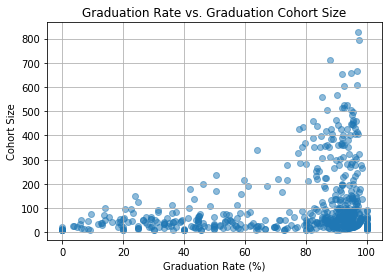

In [141]:
#Create scatterplot for graduation rate and cohort size
plt.scatter(merge_complete["Four Year Percent"], merge_complete["Four Year Total"], alpha=0.5)
plt.title('Graduation Rate vs. Graduation Cohort Size')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Cohort Size')
plt.grid(True)
plt.show()

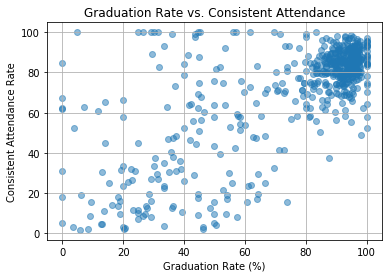

In [142]:
#Create scatterplot for graduation rate and attendance data
plt.scatter(merge_complete["Four Year Percent"], merge_complete["Consistent Attendance"], alpha=0.5)
plt.title('Graduation Rate vs. Consistent Attendance')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Consistent Attendance Rate')
plt.grid(True)
plt.show()